In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Data Preparation

* loading Dataset 

In [2]:
data =pd.read_csv('dataset.csv')

* Exploratory Data Analysis (EDA)

In [3]:
data.head()


,Sold_On,Size,Ingredients_Cost,Design_Complexity,Time_Taken,Price,Amount,Gender
0,Monday,large,28,complex,6,49,10,female
1,Saturday,medium,65,simple,2,93,9,female
2,Wednesday,large,96,simple,5,128,8,male
3,Tuesday,medium,155,simple,3,198,6,female
4,Saturday,large,20,simple,2,32,5,male


In [4]:
data.shape

(4000, 8)

In [5]:
data.columns

Index(['Sold_On', 'Size', 'Ingredients_Cost', 'Design_Complexity',
       'Time_Taken', 'Price', 'Amount', 'Gender'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sold_On            4000 non-null   object
 1   Size               4000 non-null   object
 2   Ingredients_Cost   4000 non-null   int64 
 3   Design_Complexity  4000 non-null   object
 4   Time_Taken         4000 non-null   int64 
 5   Price              4000 non-null   int64 
 6   Amount             4000 non-null   int64 
 7   Gender             4000 non-null   object
dtypes: int64(4), object(4)
memory usage: 250.1+ KB


In [7]:
data.describe(include='all')

,Sold_On,Size,Ingredients_Cost,Design_Complexity,Time_Taken,Price,Amount,Gender
count,4000,4000,4000.000000,4000,4000.000000,4000.000000,4000.000000,4000
unique,7,3,NaN,2,NaN,NaN,NaN,2
top,Wednesday,medium,NaN,simple,NaN,NaN,NaN,male
freq,598,1371,NaN,2028,NaN,NaN,NaN,2006
mean,NaN,NaN,111.552500,NaN,4.683000,154.680750,5.455000,NaN
std,NaN,NaN,57.863428,NaN,2.830285,76.282079,2.871591,NaN
min,NaN,NaN,10.000000,NaN,1.000000,14.000000,1.000000,NaN
25%,NaN,NaN,62.000000,NaN,2.750000,90.000000,3.000000,NaN
50%,NaN,NaN,113.000000,NaN,4.000000,154.000000,5.000000,NaN
75%,NaN,NaN,162.000000,NaN,6.000000,217.000000,8.000000,NaN


In [8]:
numeric_col = [col for col in data.columns if data[col].dtype != 'object']
categorical_col = [col for col in data.columns if data[col].dtype == 'object']

In [9]:
numeric_col

['Ingredients_Cost', 'Time_Taken', 'Price', 'Amount']

In [10]:
categorical_col

['Sold_On', 'Size', 'Design_Complexity', 'Gender']

C:\Users\sondo\AppData\Local\Temp\ipykernel_22132\990193361.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Design_Complexity', palette='viridis')


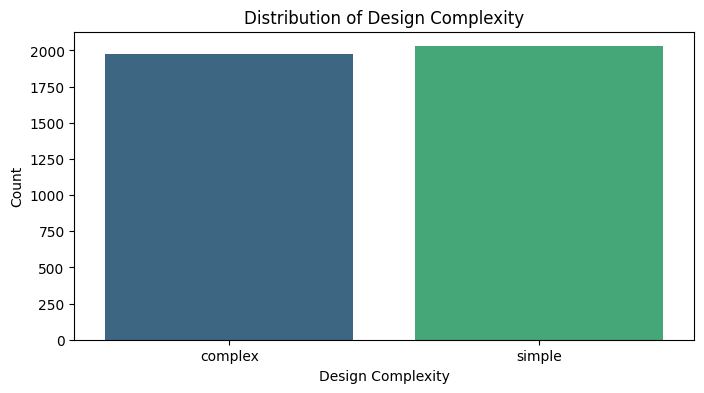

In [11]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Design_Complexity', palette='viridis')
plt.title('Distribution of Design Complexity')
plt.xlabel('Design Complexity')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Size', ylabel='Count'>

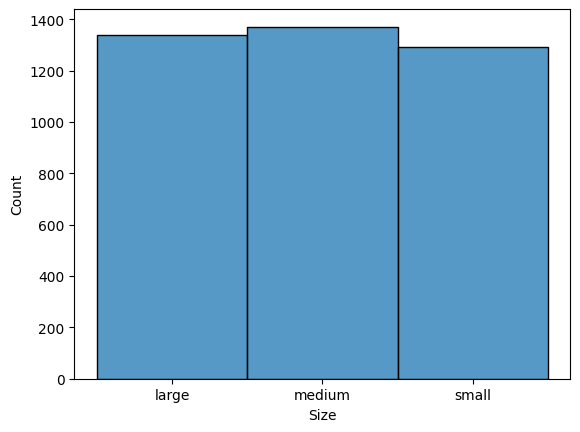

In [12]:
sns.histplot(data=data, x='Size',bins=15)

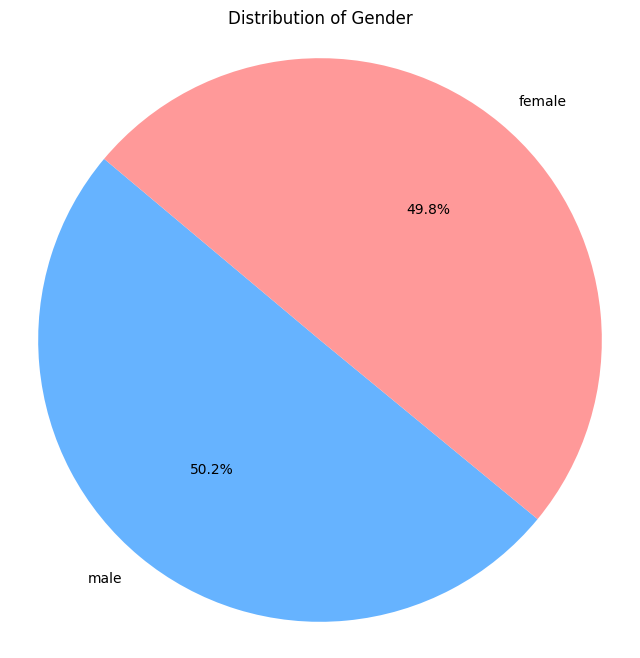

In [13]:
plt.figure(figsize=(8, 8))
plt.pie(data['Gender'].value_counts(), labels=data['Gender'].value_counts().index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
plt.title('Distribution of Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

C:\Users\sondo\AppData\Local\Temp\ipykernel_22132\3568981463.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Sold_On', palette='viridis')


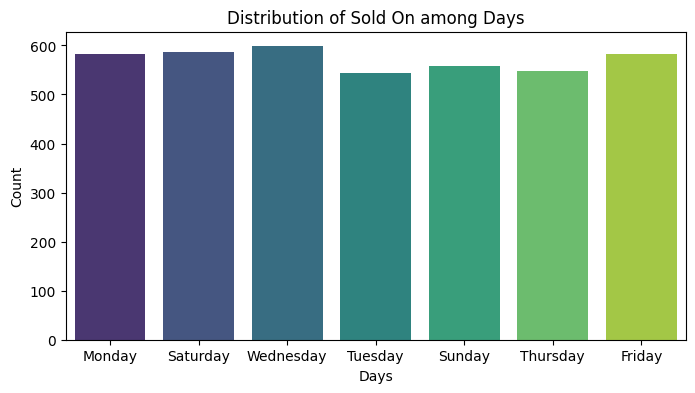

In [14]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Sold_On', palette='viridis')
plt.title('Distribution of Sold On among Days')
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()


* Data Cleaning

In [15]:
df=data.copy()

In [16]:
df.isnull().sum()

Sold_On              0
Size                 0
Ingredients_Cost     0
Design_Complexity    0
Time_Taken           0
Price                0
Amount               0
Gender               0
dtype: int64

In [17]:
def detectOutlier(data,f):
    Q1=data[f].quantile(0.25)
    Q3=data[f].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    return lower_bound,upper_bound

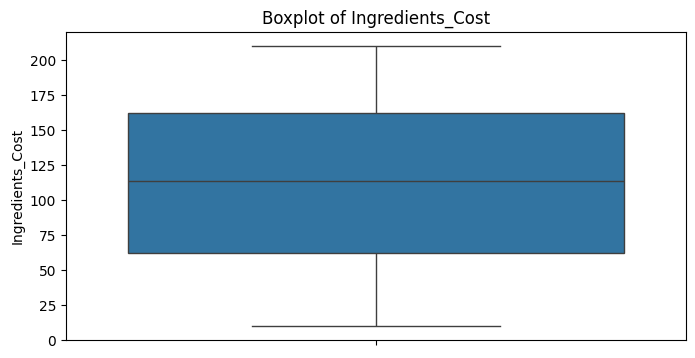

Feature: Ingredients_Cost - Lower Bound: -88.0, Upper Bound: 312.0


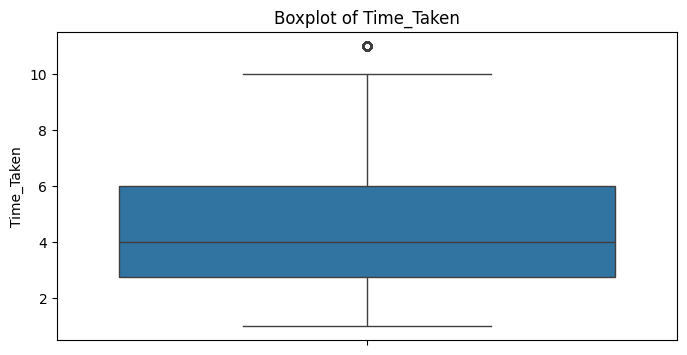

Feature: Time_Taken - Lower Bound: -2.125, Upper Bound: 10.875


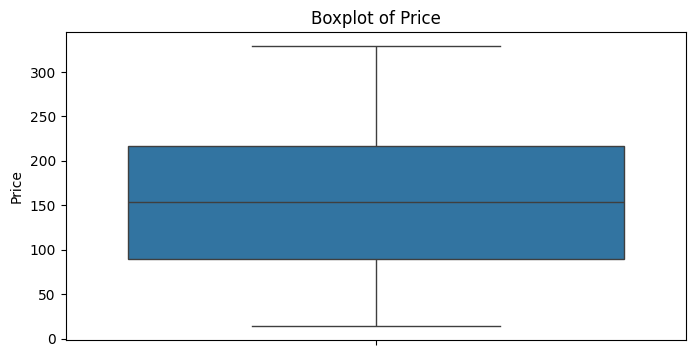

Feature: Price - Lower Bound: -100.5, Upper Bound: 407.5


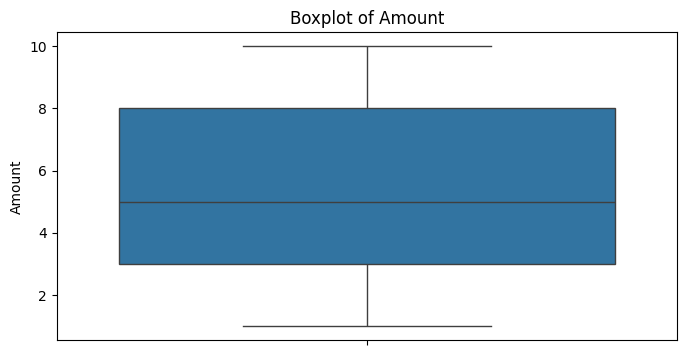

Feature: Amount - Lower Bound: -4.5, Upper Bound: 15.5


In [18]:
for feature in numeric_col:
    plt.figure(figsize=(8, 4))
    sns.boxplot(df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()
    
    lb,ub=detectOutlier(df,feature)
    print(f'Feature: {feature} - Lower Bound: {lb}, Upper Bound: {ub}')
    
    # Cap the outliers
    df[feature] = np.where(df[feature] < lb, lb, df[feature])
    df[feature] = np.where(df[feature] > ub, ub, df[feature])


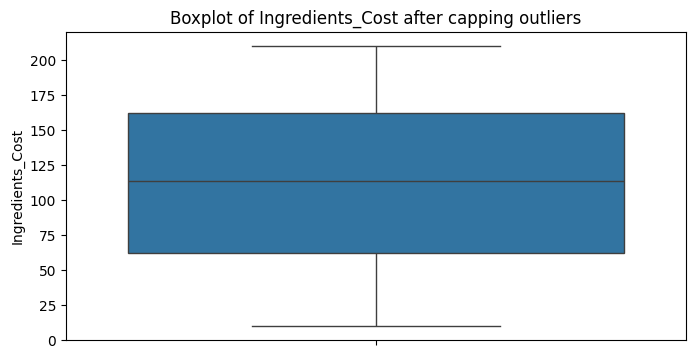

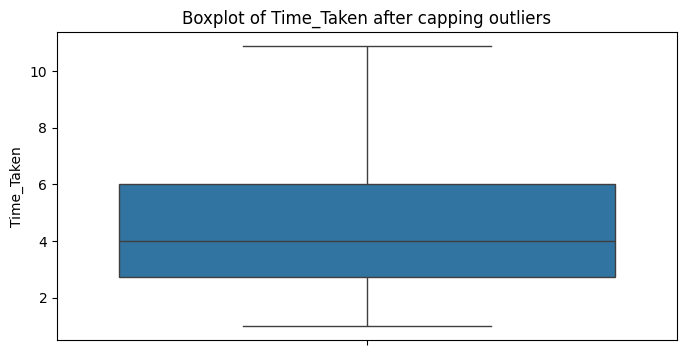

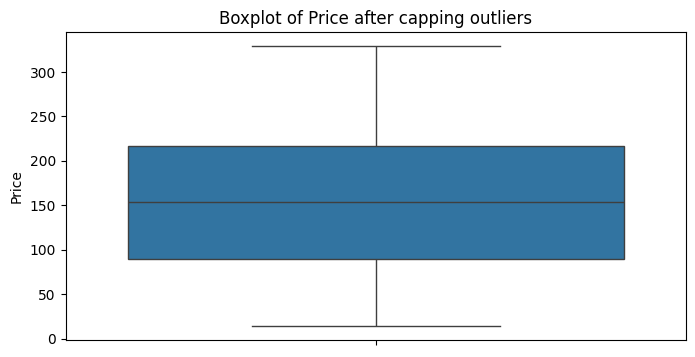

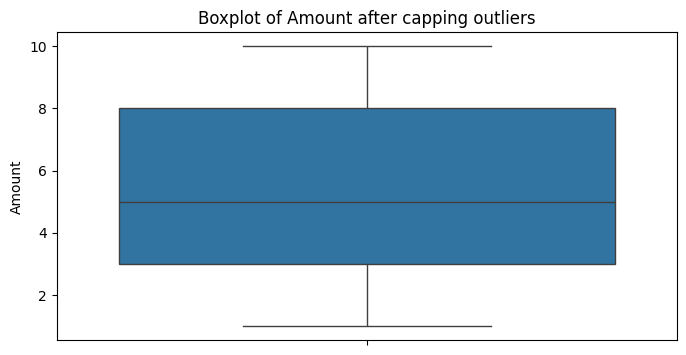

In [19]:
for feature in numeric_col:
    plt.figure(figsize=(8, 4))
    sns.boxplot(df[feature])
    plt.title(f'Boxplot of {feature} after capping outliers')
    plt.show()

* Data Transformation

In [20]:
label_encoder =LabelEncoder()
df['Size']=label_encoder.fit_transform(data['Size'])
df['Design_Complexity']=label_encoder.fit_transform(data['Design_Complexity'])
df['Gender']=label_encoder.fit_transform(data['Gender'])




In [21]:
# convert categorical data into a binary matrix
sold_on_encoded_df = pd.get_dummies(df['Sold_On'], prefix='Sold_On')

df = pd.concat([df.drop(['Sold_On'], axis=1), sold_on_encoded_df], axis=1)



In [22]:
scaler = StandardScaler()
df[numeric_col]=scaler.fit_transform(df[numeric_col])

In [23]:
df.head(20)

,Size,Ingredients_Cost,Design_Complexity,Time_Taken,Price,Amount,Gender,Sold_On_Friday,Sold_On_Monday,Sold_On_Saturday,Sold_On_Sunday,Sold_On_Thursday,Sold_On_Tuesday,Sold_On_Wednesday
0,0,-1.444141,0,0.470005,-1.385567,1.582944,0,False,True,False,False,False,False,False
1,1,-0.804624,1,-0.950586,-0.808689,1.234662,0,False,False,True,False,False,False,False
2,0,-0.268813,1,0.114857,-0.349808,0.886379,1,False,False,False,False,False,False,True
3,1,0.750957,1,-0.595438,0.567953,0.189814,0,False,False,False,False,False,True,False
4,0,-1.582415,1,-0.950586,-1.608452,-0.158469,1,False,False,True,False,False,False,False
5,0,0.266998,1,0.114857,0.056629,-1.551599,0,False,False,False,True,False,False,False
6,0,0.837378,0,-0.240291,0.987501,0.886379,0,False,False,True,False,False,False,False
7,1,0.439841,1,0.114857,0.397512,0.538096,1,False,False,False,False,True,False,False
8,2,-1.305867,1,-0.595438,-1.280680,1.234662,1,True,False,False,False,False,False,False
9,0,-0.787340,1,-0.950586,-0.992241,-0.855034,1,False,False,True,False,False,False,False


# Step 2: Feature Selection

* Correlation Analysis

In [24]:
corr =df.corr()['Price'].drop('Price')
print("Correlations with Price:")
corr

Correlations with Price:


Size                 0.001968
Ingredients_Cost     0.976499
Design_Complexity   -0.118308
Time_Taken           0.121090
Amount              -0.019290
Gender              -0.007720
Sold_On_Friday       0.003466
Sold_On_Monday      -0.015595
Sold_On_Saturday    -0.013103
Sold_On_Sunday      -0.012940
Sold_On_Thursday     0.016424
Sold_On_Tuesday      0.037965
Sold_On_Wednesday   -0.014727
Name: Price, dtype: float64

In [25]:
correlations = df.corr()

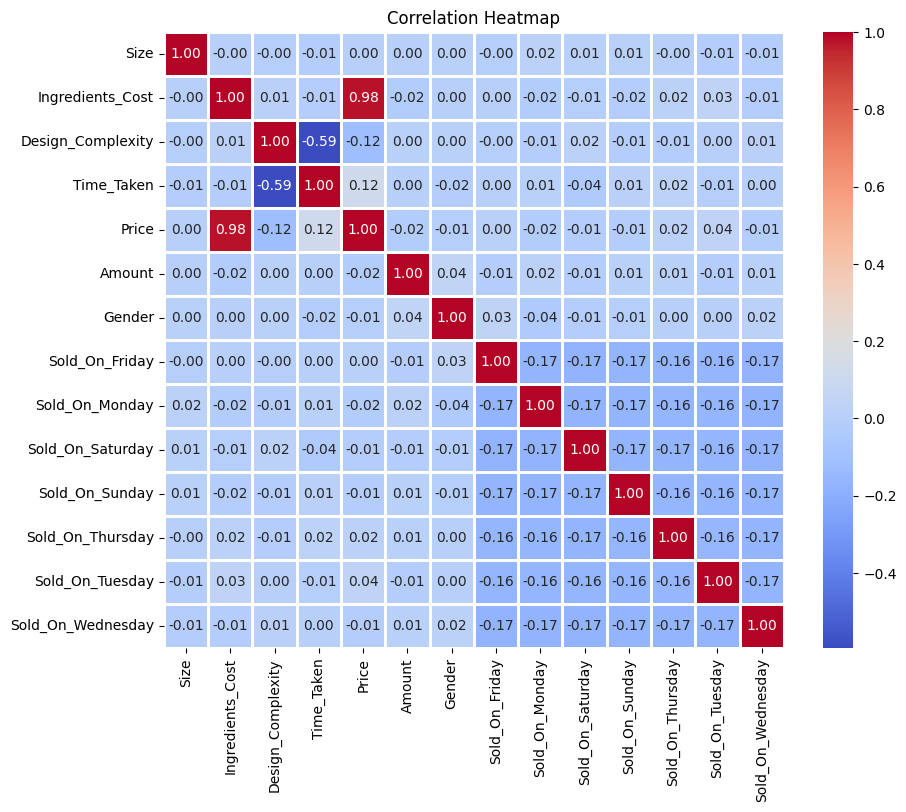

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap')
plt.show()

* Feature Importance

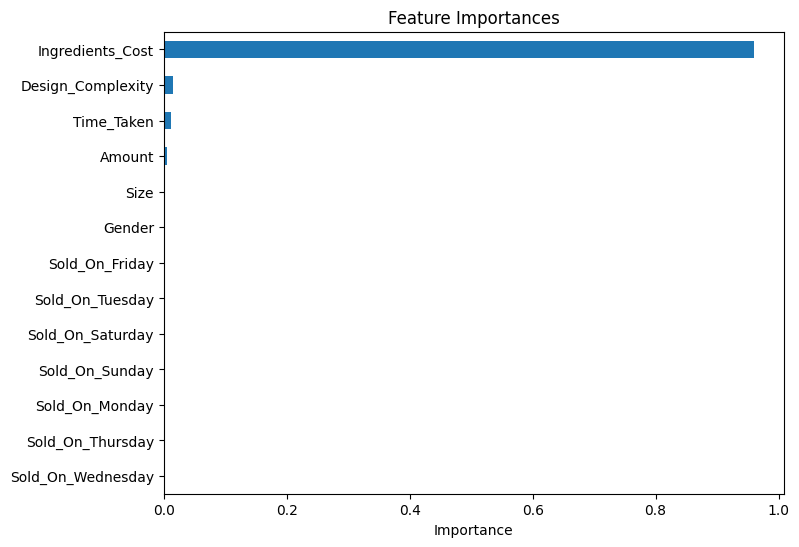

Top features based on importance:


Index(['Ingredients_Cost', 'Design_Complexity', 'Time_Taken'], dtype='object')

In [27]:

X = df.drop(['Price'], axis=1)
y = df['Price']


rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)


feature_importances = pd.Series(rf.feature_importances_, index=X.columns)


plt.figure(figsize=(8, 6))
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.show()


top_features = feature_importances.sort_values(ascending=False).index[:3]  

print("Top features based on importance:")
top_features

In [28]:
X.columns

Index(['Size', 'Ingredients_Cost', 'Design_Complexity', 'Time_Taken', 'Amount',
       'Gender', 'Sold_On_Friday', 'Sold_On_Monday', 'Sold_On_Saturday',
       'Sold_On_Sunday', 'Sold_On_Thursday', 'Sold_On_Tuesday',
       'Sold_On_Wednesday'],
      dtype='object')

In [29]:
X = X.drop(['Gender', 'Sold_On_Friday', 'Sold_On_Monday', 'Sold_On_Saturday',
           'Sold_On_Sunday', 'Sold_On_Thursday', 'Sold_On_Tuesday',
           'Sold_On_Wednesday'], axis='columns')

In [30]:
X.columns

Index(['Size', 'Ingredients_Cost', 'Design_Complexity', 'Time_Taken',
       'Amount'],
      dtype='object')

# Step 3:  Models Training

* Train-Test Split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* Model Selection and Training

In [32]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=400, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR':SVR(kernel='rbf')
}

In [33]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2

# Step 4: Model Evaluation

In [34]:
results = {}
for name, model in models.items():
     mae, mse, rmse, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
     results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

In [35]:
results_df = pd.DataFrame(results).T
results_df


,MAE,MSE,RMSE,R2
Linear Regression,0.127258,0.024162,0.155440,0.974138
Random Forest,0.127585,0.027584,0.166085,0.970474
Decision Tree,0.165290,0.049439,0.222350,0.947080
Gradient Boosting,0.121669,0.023714,0.153993,0.974617
SVR,0.123715,0.024086,0.155198,0.974218


# Step 5: Model Selection and Hyperparameter Tuning

In [36]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1]
}

In [37]:
gb_model = GradientBoostingRegressor(random_state=42)

In [38]:
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [40]:
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best R-squared score: {grid_search.best_score_:.4f}")

Best hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best R-squared score: 0.9761


In [42]:
import pickle

# Save the best model
with open('price_prediction_model.pkl', 'wb') as file:
    pickle.dump(grid_search.best_estimator_, file)

# Step 6: Prediction

In [48]:
with open('price_prediction_model.pkl', 'rb') as file:
    model = pickle.load(file)

In [52]:
new_cake = pd.DataFrame({
    'Size': [2],
    'Ingredients_Cost': [15],
    'Design_Complexity': [1],
    'Time_Taken': [5],
    'Amount': [1],
    
})

In [53]:
predictions = model.predict(new_cake)

In [54]:
print(f"The predicted price for the new cake is: {predictions[0]:.2f}")

The predicted price for the new cake is: 1.65
